In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from google.colab import files
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET (1).csv


In [2]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
df['FullDate'] = pd.to_datetime(df.FullDate)

In [4]:
df.set_index('FullDate', inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
df.shape

(92016, 4)

In [7]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [9]:
# resampling the dataset to a daily timeframe
df_daily = df.resample("D").sum()
df_daily.head()


,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


<Axes: xlabel='FullDate'>

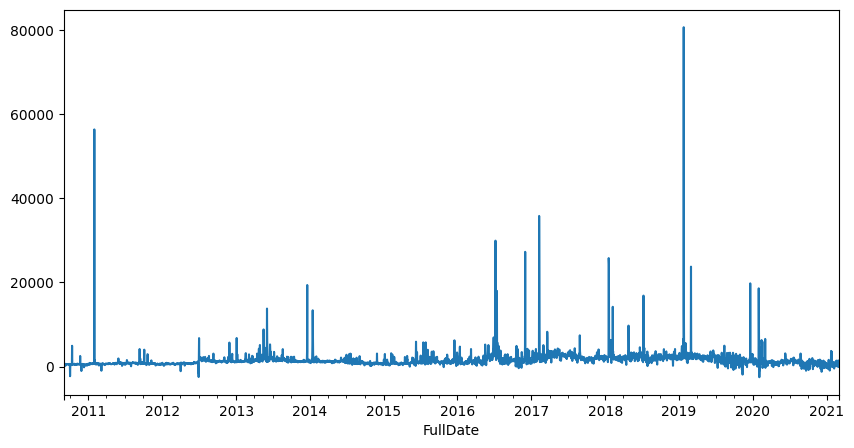

In [12]:
#Plotting Electric Price
plt.figure(figsize=(10,5))
df_daily["ElecPrice"].plot()

In [19]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as sts

In [44]:
sys_p_value = sts.adfuller(df_daily["SysLoad"])[1]
gas_price_p_value = sts.adfuller(df_daily["GasPrice"])[1]
print("sys p value",np.round(sys_p_value,decimals=6))
print("Gas Price p value",np.round(gas_price_p_value,decimals=6))

sys p value 0.0
Gas Price p value 0.0


In [43]:
x = sts.adfuller(df_daily["SysLoad"])[4]["10%"]
y = sts.adfuller(df_daily["ElecPrice"])[4]["5%"]
print("sys 10% critical",np.round(x,decimals=6))
print("Elecprice 5% critical",np.round(y,decimals=6))

sys 10% critical -2.566787
Elecprice 5% critical -2.861571


In [45]:
#Reset index
df_daily = df.reset_index()
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [96]:
# select columns for predictive model
y_true = test["y"]
preds = model.predict(test)
preds


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-24 21:00:00,13.531416,-119.638168,140.292471,13.531416,13.531416,-0.168931,-0.168931,-0.168931,-2.060519,-2.060519,-2.060519,1.891589,1.891589,1.891589,0.0,0.0,0.0,13.362485
1,2010-12-24 22:00:00,13.520181,-103.134345,139.166628,13.520181,13.520181,-0.540040,-0.540040,-0.540040,-2.479208,-2.479208,-2.479208,1.939169,1.939169,1.939169,0.0,0.0,0.0,12.980141
2,2010-12-24 23:00:00,13.508946,-113.932890,138.765519,13.508946,13.508946,1.201403,1.201403,1.201403,-0.698827,-0.698827,-0.698827,1.900230,1.900230,1.900230,0.0,0.0,0.0,14.710350
3,2010-12-25 00:00:00,13.497712,-109.155327,152.608442,13.497712,13.497712,2.081440,2.081440,2.081440,0.308831,0.308831,0.308831,1.772609,1.772609,1.772609,0.0,0.0,0.0,15.579152
4,2010-12-25 01:00:00,13.486477,-116.905772,141.846579,13.486477,13.486477,-0.019701,-0.019701,-0.019701,-1.575023,-1.575023,-1.575023,1.555322,1.555322,1.555322,0.0,0.0,0.0,13.466776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89254,2021-02-28 19:00:00,-989.211581,-32801.306112,27403.604642,-32804.699642,27311.878510,-0.252655,-0.252655,-0.252655,6.435906,6.435906,6.435906,-6.688561,-6.688561,-6.688561,0.0,0.0,0.0,-989.464236
89255,2021-02-28 20:00:00,-989.222816,-32906.047024,27161.115883,-32805.129650,27312.232374,-3.984759,-3.984759,-3.984759,1.624289,1.624289,1.624289,-5.609048,-5.609048,-5.609048,0.0,0.0,0.0,-993.207575
89256,2021-02-28 21:00:00,-989.234051,-32913.468703,27313.259236,-32805.559659,27312.586238,-6.592362,-6.592362,-6.592362,-2.060519,-2.060519,-2.060519,-4.531843,-4.531843,-4.531843,0.0,0.0,0.0,-995.826413
89257,2021-02-28 22:00:00,-989.245285,-32923.913363,27331.352521,-32805.989668,27312.940102,-5.946776,-5.946776,-5.946776,-2.479208,-2.479208,-2.479208,-3.467568,-3.467568,-3.467568,0.0,0.0,0.0,-995.192062


In [98]:
#Divide data into training and testing
# assign train and test data
train = model_data[:2757]
test = model_data[2757:]
print("Full data:",len(model_data))
print("Train plus test:",len(train) + len(test))


Full data: 92016
Train plus test: 92016


In [99]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)


In [100]:
train.dtypes

index             int64
ds       datetime64[ns]
y               float64
dtype: object

**facebook prophet model prediction**

In [40]:
!pip install prophet

import prophet

In [41]:
from prophet import Prophet

In [63]:
model = Prophet()
model.fit(train[['ds', 'y']])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzxr82pq/fco1b6tx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzxr82pq/n5kqeenz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25139', 'data', 'file=/tmp/tmplzxr82pq/fco1b6tx.json', 'init=/tmp/tmplzxr82pq/n5kqeenz.json', 'output', 'file=/tmp/tmplzxr82pq/prophet_modelnxmz0dig/prophet_model-20230801212525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:25:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:25:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [101]:
test_pred = test[['ds']]
forecast = model.predict(test_pred)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-24 21:00:00,13.531416,-113.625695,139.879726,13.531416,13.531416,-0.168931,-0.168931,-0.168931,-2.060519,-2.060519,-2.060519,1.891589,1.891589,1.891589,0.0,0.0,0.0,13.362485
1,2010-12-24 22:00:00,13.520181,-116.218703,140.965718,13.520181,13.520181,-0.540040,-0.540040,-0.540040,-2.479208,-2.479208,-2.479208,1.939169,1.939169,1.939169,0.0,0.0,0.0,12.980141
2,2010-12-24 23:00:00,13.508946,-114.126136,141.677253,13.508946,13.508946,1.201403,1.201403,1.201403,-0.698827,-0.698827,-0.698827,1.900230,1.900230,1.900230,0.0,0.0,0.0,14.710350
3,2010-12-25 00:00:00,13.497712,-110.475349,147.387881,13.497712,13.497712,2.081440,2.081440,2.081440,0.308831,0.308831,0.308831,1.772609,1.772609,1.772609,0.0,0.0,0.0,15.579152
4,2010-12-25 01:00:00,13.486477,-116.595081,131.009384,13.486477,13.486477,-0.019701,-0.019701,-0.019701,-1.575023,-1.575023,-1.575023,1.555322,1.555322,1.555322,0.0,0.0,0.0,13.466776


In [105]:
#Calaculating mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
def metric_mape(y, yhat):
  y = np.array(y)
  yhat = np.array(yhat)
  return np.mean(np.abs((y - yhat)/y)) *100
MAPE = metric_mape(test["y"], preds["yhat"])
round(MAPE,2)

<ipython-input-105-bb142cbc1027>:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y - yhat)/y)) *100


inf

In [106]:
#Calculating root mean squrared error
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.y, forecast.yhat))
print("The MAPE is :", round(rms,2))

The MAPE is : 666.96


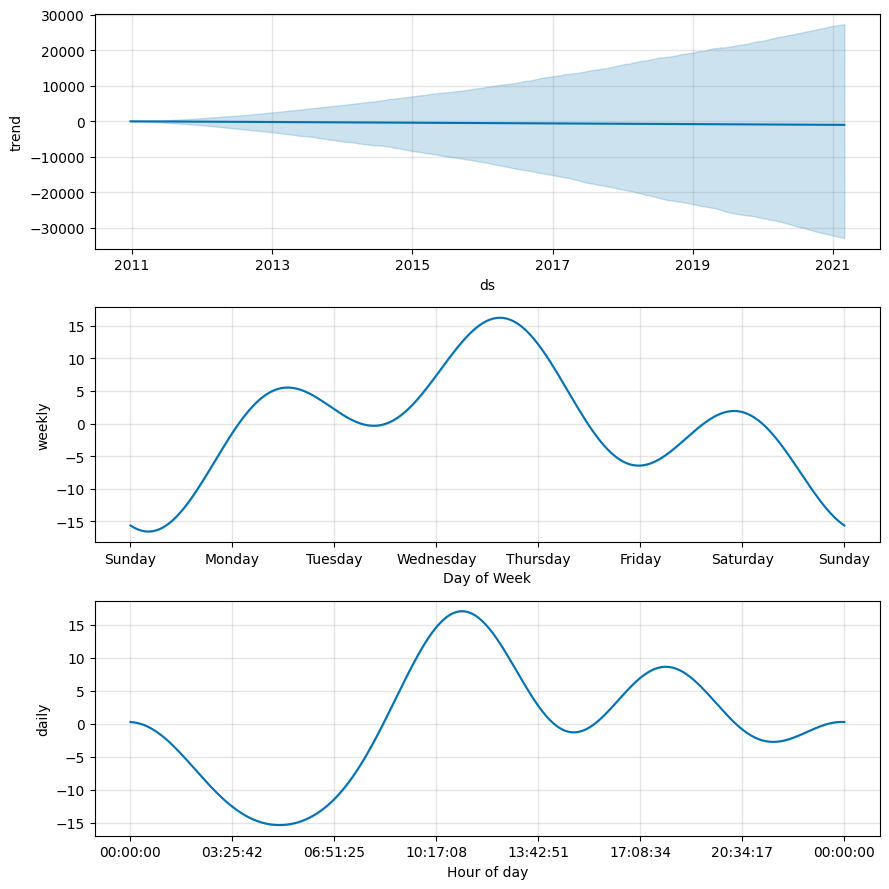

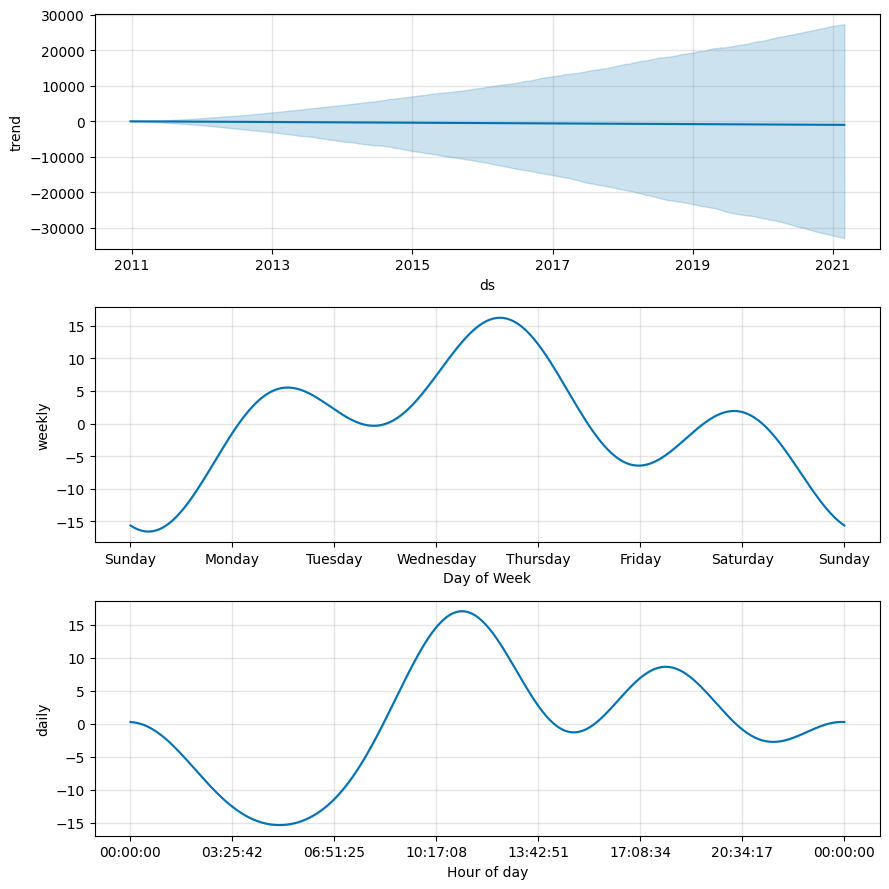

In [110]:
model.plot_components(preds)


In [129]:
df_daily = df_daily.rename(columns={"SysLoad":"add1","Tmax":"add2","GasPrice":"add3"})
df_daily.head()

,ds,add2,add1,add3,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [130]:
new_train = df_daily.loc[:2756]
new_test  = df_daily.loc[2757:]
print("Full data:",len(df_daily))
print("Train plus test:",len(new_train) + len(new_test))

Full data: 92016
Train plus test: 92016


In [131]:
#Using multiple variables predictors
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [133]:
#Divide into trainning and test
model2.fit(new_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzxr82pq/vshdnuta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzxr82pq/3djva40f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77579', 'data', 'file=/tmp/tmplzxr82pq/vshdnuta.json', 'init=/tmp/tmplzxr82pq/3djva40f.json', 'output', 'file=/tmp/tmplzxr82pq/prophet_modelt4aq6rlb/prophet_model-20230801223734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:37:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:37:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [135]:
#Train model
forecast2 = model2.predict(new_test)

In [136]:
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-24 21:00:00,35.768974,-94.750678,171.288918,35.768974,35.768974,3.805338,3.805338,3.805338,-0.648037,...,3.371644,3.371644,3.371644,2.731026,2.731026,2.731026,0.0,0.0,0.0,35.999396
1,2010-12-24 22:00:00,35.795675,-91.003327,160.407604,35.795675,35.795675,-2.296555,-2.296555,-2.296555,-0.648037,...,-2.730248,-2.730248,-2.730248,3.032959,3.032959,3.032959,0.0,0.0,0.0,31.924022
2,2010-12-24 23:00:00,35.822376,-100.546513,152.546168,35.822376,35.822376,-9.569038,-9.569038,-9.569038,-0.648037,...,-10.002731,-10.002731,-10.002731,3.264261,3.264261,3.264261,0.0,0.0,0.0,28.240423
3,2010-12-25 00:00:00,35.849077,-101.721147,157.421847,35.849077,35.849077,-8.375923,-8.375923,-8.375923,-0.557391,...,-8.718970,-8.718970,-8.718970,3.422245,3.422245,3.422245,0.0,0.0,0.0,31.690311
4,2010-12-25 01:00:00,35.875778,-94.897744,155.673848,35.875778,35.875778,-6.959696,-6.959696,-6.959696,-0.557391,...,-7.302743,-7.302743,-7.302743,3.505201,3.505201,3.505201,0.0,0.0,0.0,32.827896


In [139]:
true = new_test['y']
pred = forecast2['yhat']

def MAPE(true, pred):
    true, pred = np.array(true), np.array(pred)
    return round(np.mean(np.abs((true - pred) / true)) * 100,2)

MAPE(true, pred)

<ipython-input-139-d6fff8620010>:6: RuntimeWarning: divide by zero encountered in true_divide
  return round(np.mean(np.abs((true - pred) / true)) * 100,2)


inf

In [141]:
mse = mean_squared_error(new_test.y,forecast2.yhat)
round(np.sqrt(mse),2)

1350.79

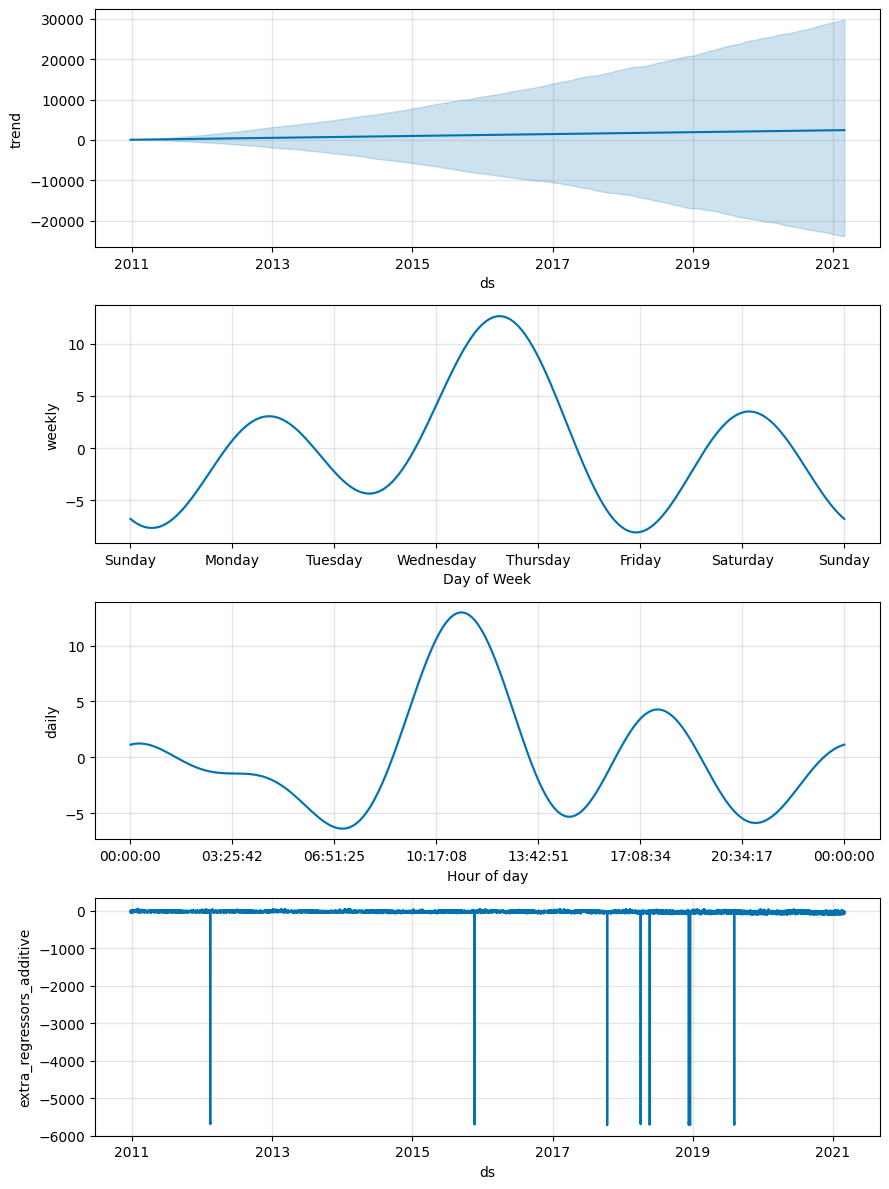

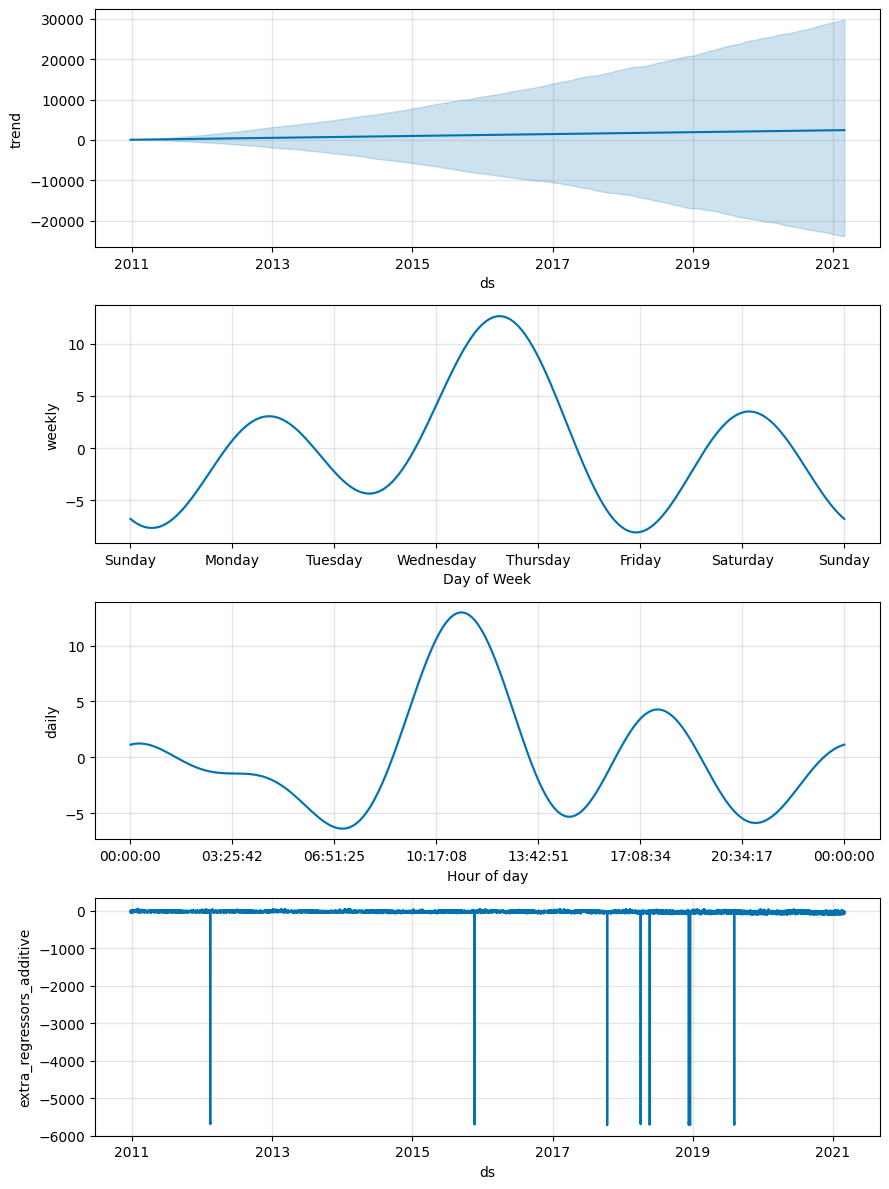

In [143]:
model2.plot_components(forecast2)

In [144]:
#Training model and omiting add2(Tmax from predictors)
model = Prophet()
model.add_regressor("add1")
model.add_regressor("add3")
#Train model
model2 = model.fit(new_train)
#make predictions on test data
pred2= model2.predict(new_test)
#Calculating MAPE metrics
def metric_mape(y, yhat):
  y = np.array(y)
  yhat = np.array(yhat)
  return np.mean(np.abs((y - yhat)/y)) *100
MAPE = metric_mape(new_test["y"], pred2["yhat"])
print("MAPE wihout Tmax:",round(MAPE,2))


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzxr82pq/ymigg2_a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzxr82pq/8njows3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36800', 'data', 'file=/tmp/tmplzxr82pq/ymigg2_a.json', 'init=/tmp/tmplzxr82pq/8njows3w.json', 'output', 'file=/tmp/tmplzxr82pq/prophet_modela3rn85vx/prophet_model-20230801224409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:44:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:44:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE wihout Tmax: inf


<ipython-input-144-96034027ae80>:13: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y - yhat)/y)) *100
